![SNARs](https://pbs.twimg.com/media/FirgAiOXEAMQF98?format=jpg&name=medium)

### <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Libraries </font>

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.io import mmread
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import powerlaw as po
plt.style.use("fivethirtyeight")
from graph_utils import BAgraph

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P7.2
Add the above solutions for the plots from the previous project

In [6]:
m0 = 3
m = 3

t = 500
n = 100

arr = np.array([])

for _ in range(n):
    ba = BAgraph(m0, m)
    ba.add_n(t)

    arr = np.concatenate([arr, np.array(list(dict(ba.graph.degree).values()))])

arr = np.reshape(arr, (n, t+m0))
hist, bins = np.histogram(arr, range(m0, int(arr.max())+1))

In [7]:
plt.plot(bins[:-1], hist/n, label='Experimental')

def f(k):
    return 2*m*(m+1)/(k*(k+1)*(k+2))

plt.plot(bins[:-1], f(bins[:-1])*(m0+t), '--r', label="Master equation")
plt.plot(bins[:-1], (2*(m**2)/(bins[:-1]**3))*(m0+t), '--g', label="Mean field")
plt.legend()
plt.show()

![](https://pbs.twimg.com/media/FjSySz5X0AI0znq?format=png&name=small)

In [9]:
plt.plot(bins[:-1], hist/n, label='Experimental')

def f(k):
    return 2*m*(m+1)/(k*(k+1)*(k+2))

plt.plot(bins[:-1], f(bins[:-1])*(m0+t), '--r', label="Theoretical")
plt.plot(bins[:-1], (2*(m**2)/(bins[:-1]**3))*(m0+t), '--g', label="Mean field")

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

![](https://pbs.twimg.com/media/FjSzbYiWAAYxceu?format=png&name=small)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P7.7
Check with simulation the above result. Plot the size of the largest cluster as a function of ⟨k⟩ = pN.

In [3]:
n = 1000

In [4]:
y = np.zeros(n)

In [5]:
p = np.random.uniform(0, 0.05, n)
N = 100
k = p * N

In [6]:
for i in range(n):
    G = nx.generators.random_graphs.erdos_renyi_graph(N,p[i])
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    y[i] = len(Gcc[0])

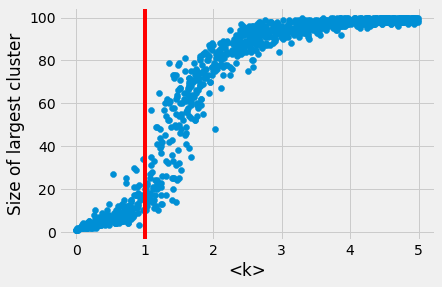

In [7]:
plt.scatter(k,y)
plt.xlabel('<k>')
plt.ylabel('Size of largest cluster')
plt.axvline(1, color='red')

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P7.18
Investigate with simulations

#### robustness of ER graph and scale-free networks to random failures

#### ER

In [8]:
N=100
n_remove=10
n=30
m=125

In [9]:
is_broken_er_nodes=np.zeros((N,n_remove))

In [10]:
for i in range(N):
    G = nx.gnm_random_graph(n, m, seed=i)
    to_remove=np.random.choice(len(G.nodes()), n_remove ,replace=False)
    for j in range(n_remove):
        G.remove_node(to_remove[j])
        is_broken_er_nodes[i,j]=1-nx.is_connected(G)

<AxesSubplot:ylabel='Count'>

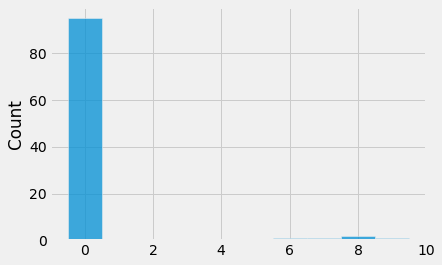

In [11]:
sns.histplot(is_broken_er_nodes.argmax(axis=1),discrete=True)

#### BA

In [12]:
is_broken_ba_nodes=np.zeros((N,n_remove))

In [13]:
for i in range(N):
    G=nx.barabasi_albert_graph(n, m=5, seed=i)
    to_remove=np.random.choice(len(G.nodes()), n_remove ,replace=False)
    for j in range(n_remove):
        G.remove_node(to_remove[j])
        is_broken_ba_nodes[i,j]=1-nx.is_connected(G)

<AxesSubplot:ylabel='Count'>

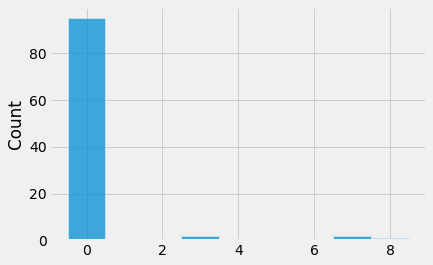

In [14]:
sns.histplot(is_broken_ba_nodes.argmax(axis=1),discrete=True)

#### robustness of ER graph and scale-free networks to intentional attacks

#### ER

In [15]:
N=100
n=30
m=125

In [16]:
is_broken_er_nodes=np.zeros(N)

In [17]:
for i in range(N):
    G = nx.gnm_random_graph(n, m, seed=i)
    is_broken_er_nodes[i]=len(nx.minimum_node_cut(G))

<AxesSubplot:ylabel='Count'>

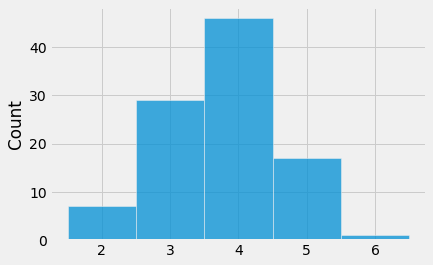

In [18]:
sns.histplot(is_broken_er_nodes,discrete=True)

#### BA

In [19]:
is_broken_ba_nodes=np.zeros(N)

In [20]:
for i in range(N):
    G=nx.barabasi_albert_graph(n, m=5, seed=i)
    is_broken_ba_nodes[i]=len(nx.minimum_node_cut(G))

<AxesSubplot:ylabel='Count'>

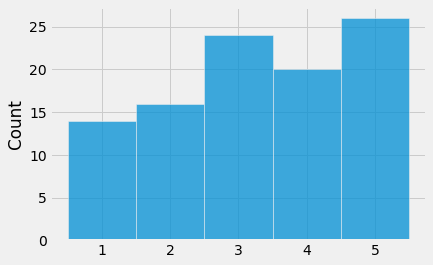

In [21]:
sns.histplot(is_broken_ba_nodes,discrete=True)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P7.19
 Which type of graph is more robust on those two threats?

Based on the experiments of above solution ER is more roboust

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)